In [1]:
import pandas as pd

# some lines have too many fields (?), so skip bad lines
url ='https://raw.githubusercontent.com/wndtn/hcmld21/main/Datasets/CUB_200_2011/image_attribute_labels.txt'
imgatt = pd.read_csv(url,
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                     usecols=[0,1,2], names=['imgid', 'attid', 'present'])

# description from dataset README:
# 
# The set of attribute labels as perceived by MTurkers for each image
# is contained in the file attributes/image_attribute_labels.txt, with
# each line corresponding to one image/attribute/worker triplet:
#
# <image_id> <attribute_id> <is_present> <certainty_id> <time>
#
# where <image_id>, <attribute_id>, <certainty_id> correspond to the IDs
# in images.txt, attributes/attributes.txt, and attributes/certainties.txt
# respectively.  <is_present> is 0 or 1 (1 denotes that the attribute is
# present).  <time> denotes the time spent by the MTurker in seconds.


###Exercise 1
Import csv file from github by using its url.
<br>https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92


In [2]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [3]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [4]:
imgatt.shape

(3677856, 3)

In [5]:
# need to reorganize imgatt to have one row per imgid, and 312 columns (one column per attribute),
# with 1/0 in each cell representing if that imgid has that attribute or not

imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

In [6]:
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
imgatt2.shape

(11788, 312)

In [8]:
# now we need to load the image true classes
url2='https://raw.githubusercontent.com/wndtn/hcmld21/main/Datasets/CUB_200_2011/image_class_labels.txt'
imglabels = pd.read_csv(url2, 
                        sep=' ', header=None, names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

# description from dataset README:
#
# The ground truth class labels (bird species labels) for each image are contained
# in the file image_class_labels.txt, with each line corresponding to one image:
#
# <image_id> <class_id>
#
# where <image_id> and <class_id> correspond to the IDs in images.txt and classes.txt,
# respectively.

In [9]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


In [10]:
imglabels.shape

(11788, 1)

In [11]:
# now we need to attach the labels to the attribute data set,
# and shuffle; then we'll separate a test set from a training set

df = imgatt2.join(imglabels)
#df = df.sample(frac=1)

In [12]:
print(df)

       1  2  3  4  5  6  7  8  9  ...  305  306  307  308  309  310  311  312  label
imgid                             ...                                               
1      0  0  0  0  1  0  0  0  0  ...    0    0    0    1    0    0    0    0      1
2      0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
3      0  0  0  0  1  0  0  0  0  ...    0    0    0    1    0    0    1    0      1
4      0  0  0  0  1  0  0  0  0  ...    0    1    0    0    1    0    0    0      1
5      0  0  0  0  1  0  0  0  0  ...    1    0    0    0    0    0    0    0      1
...   .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
11784  0  1  0  0  0  0  0  0  0  ...    0    1    0    0    1    0    0    0    200
11785  0  0  0  0  0  0  1  0  0  ...    0    1    0    1    0    0    0    0    200
11786  0  0  0  0  0  0  1  0  0  ...    0    0    0    1    0    0    1    0    200
11787  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0   

In [13]:
df = df.sample(frac=1)
print(df)

       1  2  3  4  5  6  7  8  9  ...  305  306  307  308  309  310  311  312  label
imgid                             ...                                               
10715  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    1    0    182
7785   0  0  0  0  0  0  0  1  0  ...    1    0    0    0    0    0    1    0    133
6227   0  1  0  0  0  0  0  0  0  ...    1    0    0    0    1    0    0    0    107
3785   0  0  0  0  1  0  0  0  0  ...    0    0    0    0    0    0    0    1     66
2053   0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    1    0     37
...   .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
10495  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    1    0    179
10087  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    1    0    0    0    172
10711  0  0  0  0  0  0  1  0  0  ...    0    0    0    0    0    0    1    0    182
5060   0  0  0  0  0  1  0  0  0  ...    1    0    0    0    0   

In [14]:
df_att = df.iloc[:, :312]
print(df_att)
df_label = df.iloc[:, 312:]
print(df_label)

       1    2    3    4    5    6    7    ...  306  307  308  309  310  311  312
imgid                                     ...                                   
10715    0    0    0    0    0    0    1  ...    0    0    0    0    0    1    0
7785     0    0    0    0    0    0    0  ...    0    0    0    0    0    1    0
6227     0    1    0    0    0    0    0  ...    0    0    0    1    0    0    0
3785     0    0    0    0    1    0    0  ...    0    0    0    0    0    0    1
2053     0    0    0    0    0    0    1  ...    0    0    0    0    0    1    0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
10495    0    0    0    0    0    0    1  ...    0    0    0    0    0    1    0
10087    0    0    0    0    0    0    1  ...    0    0    0    1    0    0    0
10711    0    0    0    0    0    0    1  ...    0    0    0    0    0    1    0
5060     0    0    0    0    0    1    0  ...    0    0    0    0    0    0    1
123      0    0    0    0   

In [15]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10715,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7785,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
6227,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3785,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2053,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [16]:
df_label.head()

,label
imgid,
10715,182
7785,133
6227,107
3785,66
2053,37


In [17]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]
print(df_train_label)
df_train_label = df_train_label['label']
print(df_train_label)
df_test_label = df_test_label['label']

       label
imgid       
10715    182
7785     133
6227     107
3785      66
2053      37
...      ...
10259    175
751       14
4411      76
6064     104
5866     101

[8000 rows x 1 columns]
imgid
10715    182
7785     133
6227     107
3785      66
2053      37
        ... 
10259    175
751       14
4411      76
6064     104
5866     101
Name: label, Length: 8000, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [19]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
df_train_att.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10715,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7785,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
6227,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3785,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2053,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [21]:
print(clf.predict(df_train_att.head()))

[182 133 107  66  37]


In [22]:
clf.score(df_test_att, df_test_label)

0.44561774023231254

In [23]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [24]:
cm

array([[ 4,  3,  6, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  1,  0],
       [ 3,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  2,  4,  0],
       [ 0,  0,  0, ...,  0,  0, 12]])

In [25]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
url3='https://raw.githubusercontent.com/wndtn/hcmld21/main/Datasets/CUB_200_2011/classes.txt'
birds = pd.read_csv(url3,
                    sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [27]:
print(birds[199])

200.Common_Yellowthroat


Normalized confusion matrix
[[0.14 0.11 0.21 ... 0.   0.   0.  ]
 [0.   0.69 0.   ... 0.   0.06 0.  ]
 [0.14 0.   0.36 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.05 ... 0.15 0.   0.  ]
 [0.   0.   0.   ... 0.12 0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   0.71]]


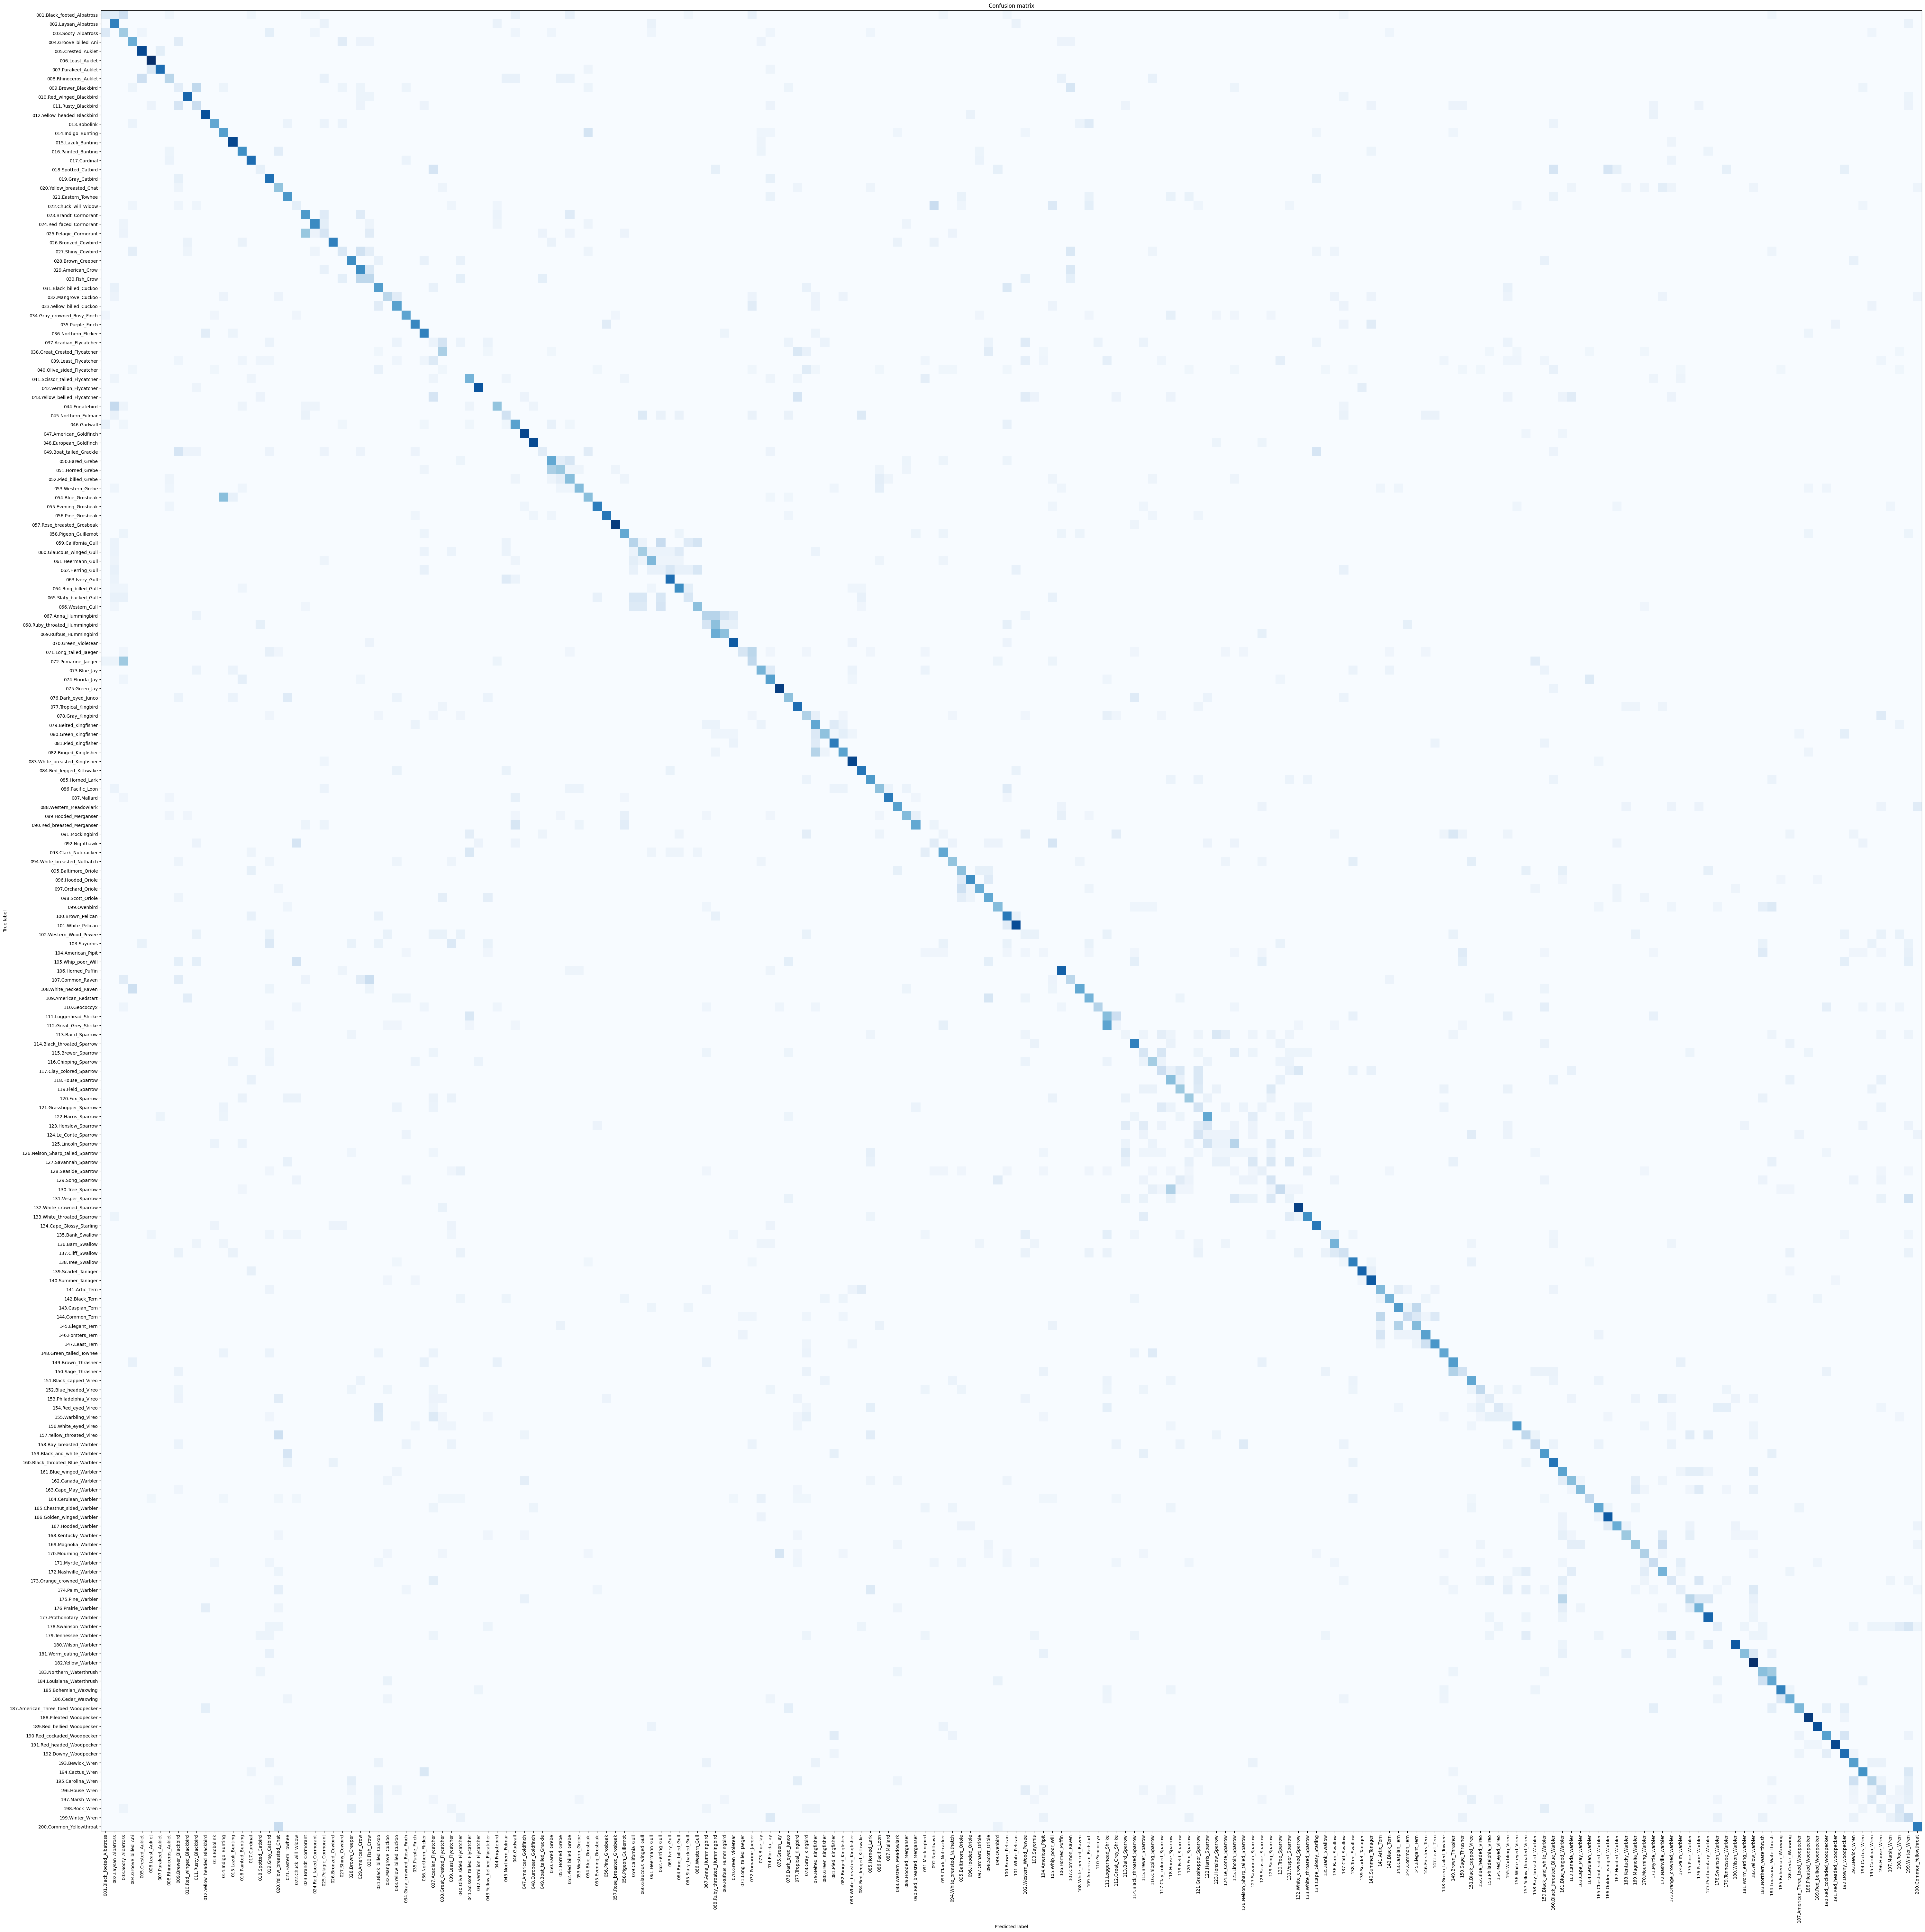

In [30]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=100)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

In [28]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.26293558606124606

In [48]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.48680042238648363

In [49]:
from sklearn import svm
clfsvm2 = svm.SVC(kernel='linear')
clfsvm2.fit(df_train_att, df_train_label)
clfsvm2.score(df_test_att, df_test_label)

0.4593453009503696

In [50]:
from sklearn import svm
clfsvm3 = svm.SVC(kernel='poly')
clfsvm3.fit(df_train_att, df_train_label)
clfsvm3.score(df_test_att, df_test_label)

0.43954593453009505

In [56]:
from sklearn import svm
clfsvm4 = svm.SVC(kernel='sigmoid')
clfsvm4.fit(df_train_att, df_train_label)
clfsvm4.score(df_test_att, df_test_label)

0.4588173178458289

In [57]:
from sklearn import svm
clfsvm5 = svm.SVC(kernel='precomputed')
clfsvm5.fit(df_train_att, df_train_label)
clfsvm5.score(df_test_att, df_test_label)

ValueError: ignored

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.44 (+/- 0.02)


###Exercise 2
cv is cross-validation. It devides train set into cv(*=5*) folds.
<br> 4 folds will be a train folds and the other will be an test fold.
<br>So, there will be 5 experiments.
<br>It seems affects to accuracy, but if it is bigger than 'some' number,
<br>it doesn't increase the accuracy anymore.
<br>https://nonmeyet.tistory.com/entry/KFold-Cross-Validation%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-%EC%A0%95%EC%9D%98-%EB%B0%8F-%EC%84%A4%EB%AA%85

In [41]:
scorestree0 = cross_val_score(clftree, df_train_att, df_train_label, cv=2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree0.mean(), scorestree0.std() * 2))

Accuracy: 0.23 (+/- 0.01)


In [42]:
scorestree0_ = cross_val_score(clftree, df_train_att, df_train_label, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree0_.mean(), scorestree0_.std() * 2))

Accuracy: 0.25 (+/- 0.01)


In [32]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.01)


In [36]:
scorestree2 = cross_val_score(clftree, df_train_att, df_train_label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree2.mean(), scorestree2.std() * 2))

Accuracy: 0.27 (+/- 0.03)


In [37]:
scorestree3 = cross_val_score(clftree, df_train_att, df_train_label, cv=20)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree3.mean(), scorestree3.std() * 2))

Accuracy: 0.27 (+/- 0.05)


In [33]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.03)


In [52]:
scoressvm2 = cross_val_score(clfsvm2, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm2.mean(), scoressvm2.std() * 2))

Accuracy: 0.44 (+/- 0.03)


In [53]:
scoressvm3 = cross_val_score(clfsvm3, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm3.mean(), scoressvm3.std() * 2))

Accuracy: 0.42 (+/- 0.02)


In [58]:
scoressvm4 = cross_val_score(clfsvm4, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm4.mean(), scoressvm4.std() * 2))

Accuracy: 0.45 (+/- 0.04)


In [ ]:
scoressvm5 = cross_val_score(clfsvm5, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm5.mean(), scoressvm5.std() * 2))

###Exercise3
rbf(radial basis function, defalut) shows the highest accuracy.
<br>but I couldn't understand their principles.
<br> https://data-flair.training/blogs/svm-kernel-functions/#:~:text=SVM%20Kernel%20Functions,it%20into%20the%20required%20form.&text=These%20functions%20can%20be%20different

In [59]:
from sklearn import svm
clfsvm_auto = svm.SVC(gamma='auto')
clfsvm_auto.fit(df_train_att, df_train_label)
clfsvm_auto.score(df_test_att, df_test_label)

0.28827877507919747

In [60]:
from sklearn import svm
clfsvm_auto = svm.SVC(C=10)
clfsvm_auto.fit(df_train_att, df_train_label)
clfsvm_auto.score(df_test_att, df_test_label)

0.4894403379091869

In [61]:
from sklearn import svm
clfsvm_auto = svm.SVC(C=100)
clfsvm_auto.fit(df_train_att, df_train_label)
clfsvm_auto.score(df_test_att, df_test_label)

0.48891235480464623

In [62]:
from sklearn import svm
clfsvm_auto = svm.SVC(C=0.1)
clfsvm_auto.fit(df_train_att, df_train_label)
clfsvm_auto.score(df_test_att, df_test_label)

0.0425026399155227

In [63]:
from sklearn import svm
clfsvm_auto = svm.SVC(C=10000)
clfsvm_auto.fit(df_train_att, df_train_label)
clfsvm_auto.score(df_test_att, df_test_label)

0.48891235480464623

###Exercise 4
<br>SVM shows higher accuracy in this page than the text book. (0.48, 0.27, each.)
<br>Maybe there were some changes in defalt of SVC.
<br>The document which professer shared said that,
<br>there was a change in defalt of gamma, 'auto' to 'scale'.
<br>As I expected, gamma='auto' shows lower accuracy.
<br>C value affects the margin from the hyperplane.
<br>Lager C will have smaller margin.
<br> So, I thought big C will shows low accuracy, like overfitting.
<br> but, it wasn't.
<br>Tiny C is kind of underfitting.
<br>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br>https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel 

In [34]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf_t = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf_t, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2
        i += 1
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
              (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.02)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.01)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.02)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 130, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 150, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 190, accuracy: 0.45 (+/- 0.02)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.01)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.02)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.01)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.02)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.02)
Max features: 10, num estimators: 110, accura

KeyboardInterrupt: ignored

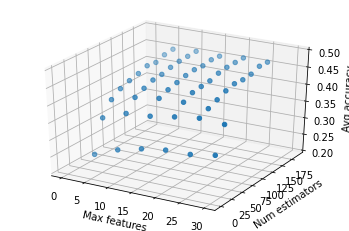

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()